# Get our environment setup

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("../input/earthquake-database/database.csv")
landslides = pd.read_csv("../input/landslide-events/catalog.csv")
volcanos = pd.read_csv("../input/volcanic-eruptions/database.csv")

# set seed for reproducibility
np.random.seed(0)

In [30]:
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [31]:
landslides['date'].dtype

dtype('O')

In [32]:
landslides.dtypes

id                        int64
date                     object
time                     object
continent_code           object
country_name             object
country_code             object
state/province           object
population                int64
city/town                object
distance                float64
location_description     object
latitude                float64
longitude               float64
geolocation              object
hazard_type              object
landslide_type           object
landslide_size           object
trigger                  object
storm_name               object
injuries                float64
fatalities              float64
source_name              object
source_link              object
dtype: object

In [33]:
landslides.get_dtype_counts()

float64     5
int64       2
object     16
dtype: int64

### # Your turn

In [66]:
earthquakes.Date.sample(5)

9325     01/21/1989
10751    01/22/1992
19733    10/15/2009
12405    04/18/1995
20938    08/16/2011
Name: Date, dtype: object

In [35]:
earthquakes.Date.dtype

dtype('O')

# Convert our date columns to datetime

In [36]:
landslides['date_parsed'] = pd.to_datetime(landslides["date"], format="%m/%d/%y")

In [37]:
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

### # Your Turn

In [51]:
earthquakes['Date_parsed'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format=True)

In [64]:
earthquakes['Date_parsed'].head()

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: Date_parsed, dtype: datetime64[ns]

In [63]:
earthquakes['Date'].head()

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object

# Select just the day of the month from out column

In [ ]:
# this will give error
day_of_month_landslides = landslides["date"].dt.day

In [67]:
day_of_month_landslides = landslides['date_parsed'].dt.day

In [68]:
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

In [69]:
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

### # Your turn

In [70]:
day_of_month_earthquakes = earthquakes['Date_parsed'].dt.day

In [71]:
day_of_month_earthquakes.head()

0    2
1    4
2    5
3    8
4    9
Name: Date_parsed, dtype: int64

In [72]:
earthquakes['Date_parsed'].head()

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: Date_parsed, dtype: datetime64[ns]

# Plot the day of the month to check the date parsing

In [80]:
day_of_month_landslides.loc[day_of_month_landslides.isnull()]

1482   NaN
1497   NaN
1526   NaN
Name: date_parsed, dtype: float64

In [82]:
landslides['date'].loc[[1482, 1497, 1498]]

1482       NaN
1497       NaN
1498    7/3/15
Name: date, dtype: object

In [83]:
landslides['date_parsed'].loc[[1482, 1497, 1498]]

1482          NaT
1497          NaT
1498   2015-07-03
Name: date_parsed, dtype: datetime64[ns]

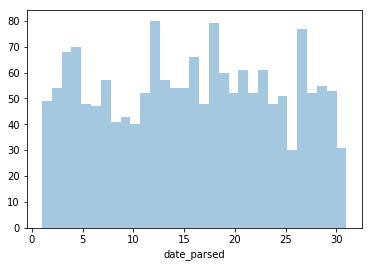

In [84]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

### # Your turn

In [88]:
day_of_month_earthquakes.isnull().sum()

0

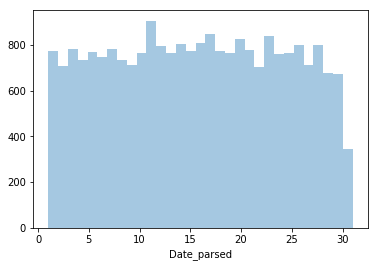

In [91]:
# remove na's (but since there are no na's, this step is not useful here)
day_of_month_earthquakes = day_of_month_earthquakes.dropna()

# plot the day of the month
sns.distplot(day_of_month_earthquakes, kde=False, bins=31)

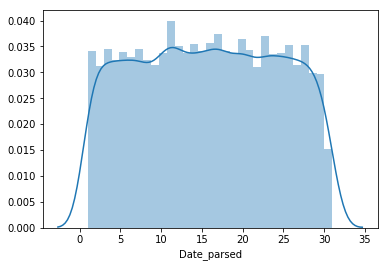

In [92]:
sns.distplot(day_of_month_earthquakes, bins=31)

# Volcanos dataset

In [99]:
volcanos['Last Known Eruption'].head(5)

0    8300 BCE
1    4040 BCE
2     Unknown
3    3600 BCE
4     1282 CE
Name: Last Known Eruption, dtype: object

In [205]:
volcanos['Last Known Eruption'].sample(5)

1075     Unknown
69       Unknown
1266      290 CE
43      3000 BCE
299      Unknown
Name: Last Known Eruption, dtype: object

In [129]:
volcanos['Last Known Eruption'].dtype

dtype('O')

In [149]:
volcanos['Last Known Eruption'].loc[3][:-4]

'3600'

In [173]:
# getting to know the unkown count
a = volcanos['Last Known Eruption'] == "Unknown"
print(a.sum())

# Uncomment if you want to remove the unkown rows

# unknown_idxs = volcanos.index[volcanos['Last Known Eruption'] == "Unknown"]
# volcanos2 = volcanos.drop(unknown_idxs)

# a = volcanos2['Last Known Eruption'] == "Unknown"
# print a.sum()

637


In [224]:
# Fix the Last Known Eruption values
volcanos['Last Known Eruption parsed'] = volcanos['Last Known Eruption'].apply(lambda x: -int(x[:-4]) if x.endswith('BCE') else (int(x[:-3]) if x.endswith('CE') else np.nan))

In [225]:
# Parse the dates
volcanos['Last Known Eruption parsed'] = volcanos['Last Known Eruption parsed'].astype('float64')

In [226]:
print(volcanos['Last Known Eruption'].head(), '\n')
print(volcanos['Last Known Eruption parsed'].head())

0    8300 BCE
1    4040 BCE
2     Unknown
3    3600 BCE
4     1282 CE
Name: Last Known Eruption, dtype: object 

0   -8300.0
1   -4040.0
2       NaN
3   -3600.0
4    1282.0
Name: Last Known Eruption parsed, dtype: float64


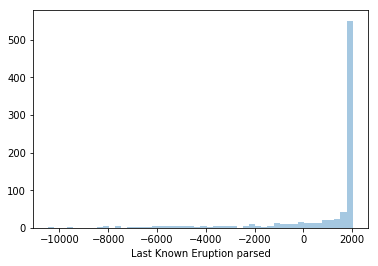

In [230]:
# plotting years after dropping na's
sns.distplot(volcanos['Last Known Eruption parsed'].dropna(), kde=False)

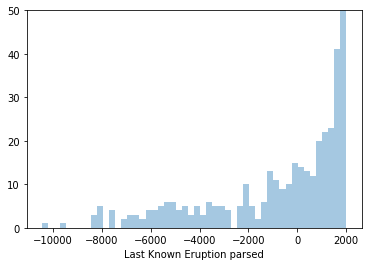

In [232]:
# Zomming in the graph

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_ylim(0, 50)
sns.distplot(volcanos['Last Known Eruption parsed'].dropna(), kde=False, ax=ax)